In [2]:
import numpy as np
import pandas_datareader.data as web
import datetime

# Treasury bond spread

10-Year Treasury data range: 1995-05-01 00:00:00 to 2025-03-01 00:00:00
Mortgage Rate data range: 1995-04-14 00:00:00 to 2025-04-03 00:00:00


Text(2000-05-19 00:00:00, 7.640000000000001, 'Max: 8.64%\n(2000-05-19)')

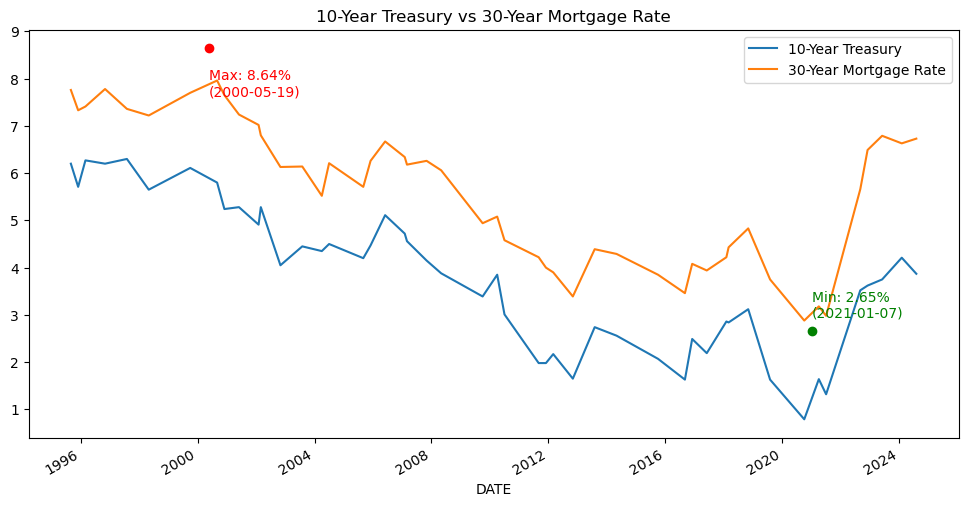

In [27]:
start = datetime.datetime.today() - datetime.timedelta(days=30*365)
end = datetime.datetime.today()

ten_year = web.DataReader('GS10', 'fred', start, end)
# Pull MBS rate (30-year fixed mortgage rate from FRED)
mortgage_rate = web.DataReader('MORTGAGE30US', 'fred', start, end)
min_rate = mortgage_rate['MORTGAGE30US'].min()
max_rate = mortgage_rate['MORTGAGE30US'].max()
min_date = mortgage_rate['MORTGAGE30US'].idxmin()
max_date = mortgage_rate['MORTGAGE30US'].idxmax()

print("10-Year Treasury data range:", ten_year.index.min(), "to", ten_year.index.max())
print("Mortgage Rate data range:", mortgage_rate.index.min(), "to", mortgage_rate.index.max())
rates = ten_year.join(mortgage_rate, how='inner')
rates.columns = ['10-Year Treasury', '30-Year Mortgage Rate']
plt = rates.plot(title="10-Year Treasury vs 30-Year Mortgage Rate", figsize=(12, 6))

plt.scatter(min_date, min_rate, color='green', zorder=5)
plt.text(min_date, min_rate + 0.3, f'Min: {min_rate:.2f}%\n({min_date.date()})', color='green')

plt.scatter(max_date, max_rate, color='red', zorder=5)
plt.text(max_date, max_rate - 1, f'Max: {max_rate:.2f}%\n({max_date.date()})', color='red')


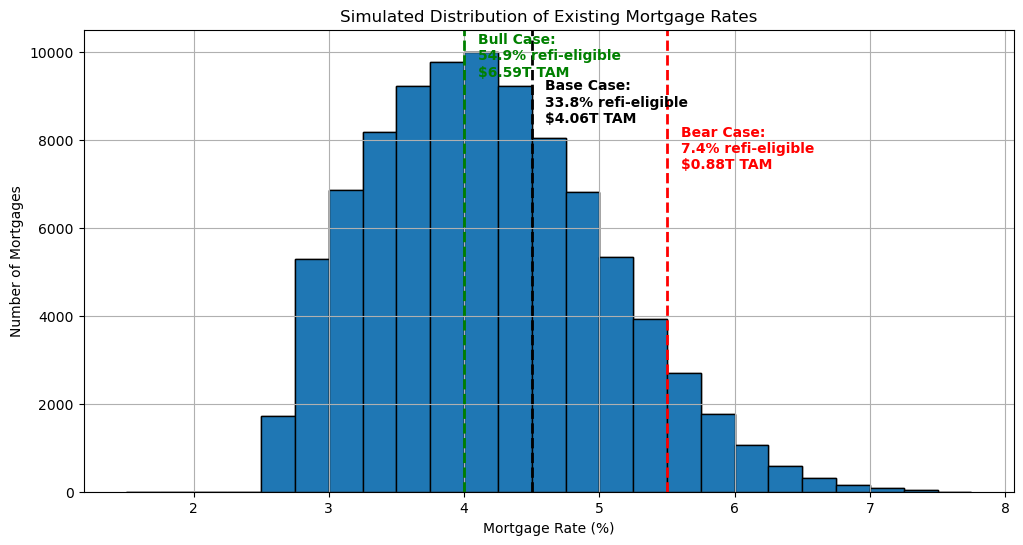

In [29]:
import matplotlib.pyplot as plt

# Simulate a population of mortgage rates
np.random.seed(42)
simulated_rates = np.random.normal(loc=4, scale=1, size=100000)
simulated_rates = simulated_rates[(simulated_rates > 2.65) & (simulated_rates < 7.5)]  # trim unrealistic values
# Projected Jan 2026 30-year mortgage rate scenarios
forecast_rates = {
    'Bull Case': 4.0,
    'Base Case': 4.5,
    'Bear Case': 5.5
}

colors = {
    'Bull Case': 'green',
    'Base Case': 'black',
    'Bear Case': 'red'
}

# Create histogram bins for analysis
bins = np.arange(1.5, 8, 0.25)
hist_vals, bin_edges = np.histogram(simulated_rates, bins=bins)

# Calculate midpoints for bar labels
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, ax = plt.subplots(figsize=(12, 6))
total_borrowers = len(simulated_rates)
ax.hist(simulated_rates, bins=np.arange(1.5, 8, 0.25), edgecolor='black', color='skyblue')

# Add vertical lines for each rate forecast
for label, rate in forecast_rates.items():
    ax.axvline(x=rate, color=colors[label], linestyle='--', linewidth=2, label=f'Forecast: {label} ({rate}%)')

y_max = ax.get_ylim()[1]
total_outstanding_mortgages = 12_000_000_000_000  # Adjust to latest figure

# Add TAM labels for each scenario
for i, (label, threshold) in enumerate(forecast_rates.items()):
    eligible_count = sum(val for val, mid in zip(hist_vals, bin_mids) if mid > threshold)
    percent = (eligible_count / total_borrowers) * 100
    tam_dollars = (percent / 100) * total_outstanding_mortgages

    # Apply vertical offset based on index to stagger labels
    vertical_offset = 0.9 - (i * 0.1)
    ax.text(threshold + 0.1, y_max * vertical_offset,
            f"{label}:\n{percent:.1f}% refi-eligible\n${tam_dollars/1e12:.2f}T TAM",
            color=colors[label], fontsize=10, weight='bold')
# Plot histogram
plt.hist(simulated_rates, bins=np.arange(1.5, 8, 0.25), edgecolor='black')
plt.title("Simulated Distribution of Existing Mortgage Rates")
plt.xlabel("Mortgage Rate (%)")
plt.ylabel("Number of Mortgages")
plt.grid(True)
plt.show()